# College Basketball Conferences
## Memphis Lau

Every year, once March comes around, we all fill out our brackets, most of us doing so blindly and without knowledge of how exactly the tournament works. This article aims to explain how conferences play into the tournament, determine which conferences are worth watching, and explore trends between high-major conferences and mid-major conferences.

## How Do Conferences Work?

In Division I College Basketball, there are 352 teams, each placed into one of the 32 conferences (or leagues) around the nation. These designations are mostly regional. They dictate a team's schedule, as they will play a majority of its games throughout the season strictly against teams in its own conference. 

At the end of the season, every conference has a tournament within itself, with seeding based on the teams' records against each other in league play. The winner of these tournaments win a guaranteeed spot into the now 68-team March Madness bracket and a chance to win the National Championship. That means 32 of the 68 teams in the tournament are locked first. The other 36 teams are chosen from any conference in the nation, chosen by a panel. 

This means every conference will be represented by at least one team every year.

### Reading in and Cleaning Data

In [1]:
import numpy as np
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
data = pd.read_csv("alldataclean.csv")

Our dataset contains every college team, its conference, season statistics, and postseason results from the last 10 seasons (9 tournaments because the 2020 tournament was cancelled).

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3160 entries, 0 to 3159
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   TEAM        3160 non-null   object 
 1   CONF        3160 non-null   object 
 2   G           3160 non-null   int64  
 3   W           3160 non-null   int64  
 4   ADJOE       3160 non-null   float64
 5   ADJDE       3160 non-null   float64
 6   BARTHAG     3160 non-null   float64
 7   EFG_O       3160 non-null   float64
 8   EFG_D       3160 non-null   float64
 9   TOR         3160 non-null   float64
 10  TORD        3160 non-null   float64
 11  ORB         3160 non-null   float64
 12  DRB         3160 non-null   float64
 13  FTR         3160 non-null   float64
 14  FTRD        3160 non-null   float64
 15  2P_O        3160 non-null   float64
 16  2P_D        3160 non-null   float64
 17  3P_O        3160 non-null   float64
 18  3P_D        3160 non-null   float64
 19  ADJ_T       3160 non-null  

As we can see, there are no missing data, except for when teams do not make the postseason tournament. We have 612 teams that did make the postseason, and the 2500+ teams in our dataset that did not make the tournament have missing values in the "POSTSEASON" and "YEAR" columns.

Because we are analyzing college basketball conferences, it is important that our dataset represents those corectly.

In [3]:
print(data.CONF.unique())
print(data.CONF.nunique())

['WCC' 'Amer' 'B12' 'ACC' 'SEC' 'BE' 'P12' 'B10' 'MWC' 'MVC' 'A10' 'OVC'
 'CUSA' 'AE' 'SC' 'WAC' 'Sum' 'CAA' 'MAAC' 'MAC' 'Ivy' 'ASun' 'Pat' 'SB'
 'BW' 'BSth' 'BSky' 'NEC' 'Horz' 'SWAC' 'MEAC' 'Slnd' 'Ind' 'ind' 'GWC']
35


This dataset has 35 unique values for conferences. This is because it represents teams that are Independent (belong to no conference) and the Great West Conference (GWC), which stopped existing after 2013. For the sake of our project staying within the 32 conferences that we have now, we will remove all teams that didn't belong to a conference or belonged to the GWC.

In [4]:
unwanted_data = data[data['CONF'].isin(['Ind', 'ind', 'GWC'])].index
data.drop(unwanted_data, inplace = True)

In [5]:
data.CONF.nunique()

32

Another important column is the 'POSTSEASON' column. Let's take a look:

In [6]:
data.POSTSEASON.unique()

array(['S16', 'E8', 'Champions', 'R32', 'F4', 'R64', '2ND', nan, 'R68'],
      dtype=object)

We see that this dataset uses abbreviations to classify which round the team made it to before losing. All teams that did not make the postseason have a missing value in this column. To make visualization easier, we will create a column that simply tells if a team made the postseason or not.

In [7]:
data['TOURNEY'] = list(map(lambda x: not x, data.POSTSEASON.isnull()))

We also want to create an order amongst the results from the postseason.

In [8]:
cat_type = CategoricalDtype(categories=['R68', 'R64', 'R32', 'S16', 'E8', 'F4', '2ND', 'Champions'], ordered=True)
data.POSTSEASON = data.POSTSEASON.astype(cat_type)

### Conference Watch

In [9]:
team_count = data.groupby('CONF').TEAM.count()
tourney_count = data.groupby('CONF').TOURNEY.sum()

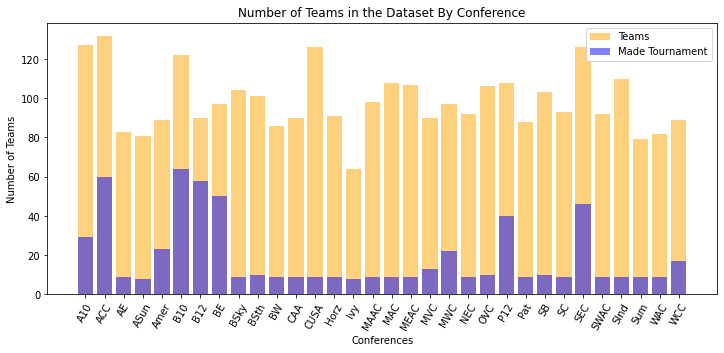

In [57]:
plt.figure(figsize=(12,5))
plt.bar(team_count.index, height = team_count, color = 'orange', alpha = 0.5, label = 'Teams')
plt.bar(tourney_count.index, height = tourney_count, color = 'blue', alpha = 0.5, label = 'Made Tournament')
plt.xticks(rotation = 60)
plt.legend()
plt.title("Number of Teams in the Dataset By Conference")
plt.xlabel("Conferences")
plt.ylabel("Number of Teams")
plt.show()

Worth noting: Ivy League only has 8 appearances in the 9 years because they shut down all sports during the pandemic and thus could not send any team to the tournament in 2021. This dataset does not have the Liberty team that represented the ASun conference in 2019, so the ASun only has 8 tournament teams in our data. Every other team has at least 9 appearances in the tournament over the last 9 eligible seasons, as expected.

We see that the number of teams represented in the data is relatively standard throughout all the different conferences. However, the number of teams that have made the tournament spike in 6 conferences. Let's explore these six.

In [11]:
pd.DataFrame(tourney_count.sort_values(ascending = False)[0:6]).rename(columns = {'TOURNEY' : 'TOURNEY APPEARANCES'})

,TOURNEY APPEARANCES
CONF,
B10,64
ACC,60
B12,58
BE,50
SEC,46
P12,40


These 6 conferences are known as "high-major" conferences. They are the Big 10, the Atlantic Coast Conference, the Big 12, the Big East, the Southeastern conference, and the Pacific 12. I will refer to these high-major conferences as Power 6 Conferences, as well.

More importantly for us, UCLA belongs to the Pac-12. However, in a couple years, UCLA will move conferences to the Big Ten.

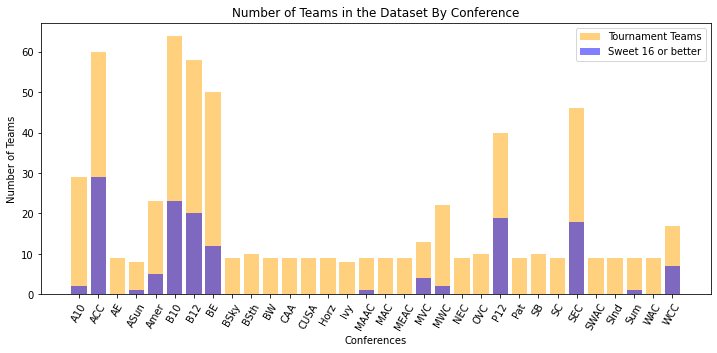

In [58]:
plt.figure(figsize = (12,5))
s16_count = data[data.POSTSEASON >= 'S16'].groupby('CONF').TEAM.count()
plt.bar(tourney_count.index, height = tourney_count, color = 'orange', alpha = 0.5, label = 'Tournament Teams')
plt.bar(s16_count.index, height = s16_count, color = 'blue', alpha = 0.5, label = 'Sweet 16 or better')
plt.xticks(rotation = 60)
plt.legend()
plt.title("Number of Teams in the Dataset By Conference")
plt.xlabel("Conferences")
plt.ylabel("Number of Teams")
plt.show()

If we look at just teams that have made the Sweet 16 in the last 9 tournaments, we again see the clear divide between the top 6 and the rest of the field again.

## High-Major Conferences vs Mid-Major Conferences

In [13]:
high_major_idx = data[data.CONF.isin(['ACC', 'B10', 'B12', 'BE', 'P12', 'SEC'])].index
high_major = data.loc[high_major_idx, :]
mid_major = data.loc[data.index.difference(high_major_idx), :]

### Regular Season

In [61]:
high_major_avg = np.round(np.mean(high_major.iloc[:, 4:19], axis = 0),2)
mid_major_avg = np.round(np.mean(mid_major.iloc[:, 4:19], axis = 0),2)
avgs = pd.concat([high_major_avg, mid_major_avg], axis = 1)
avgs.columns = ['High Major', 'Mid Major']

In [62]:
avgs

,High Major,Mid Major
ADJOE,110.44,101.09
ADJDE,96.45,104.86
BARTHAG,0.79,0.41
EFG_O,50.66,49.61
EFG_D,48.49,50.46
TOR,17.97,18.95
TORD,18.60,18.68
ORB,31.19,28.93
DRB,29.48,29.66
FTR,35.28,34.74


This table shows us that high-major teams simply are better on average than mid-major teams. Across all significant statistical factors, high-major teams have mid-major teams beat. They have a higher offensive efficiency, while having a better defensive efficiency, as well. The graph below helps us visualize this better. They turn the ball over less. However, shooting numbers are relatively even. The largest difference is in the BARTHAG score: their power rating (chances of beating an average DI team). The averages between the two types of conferences differs by almost 48%.

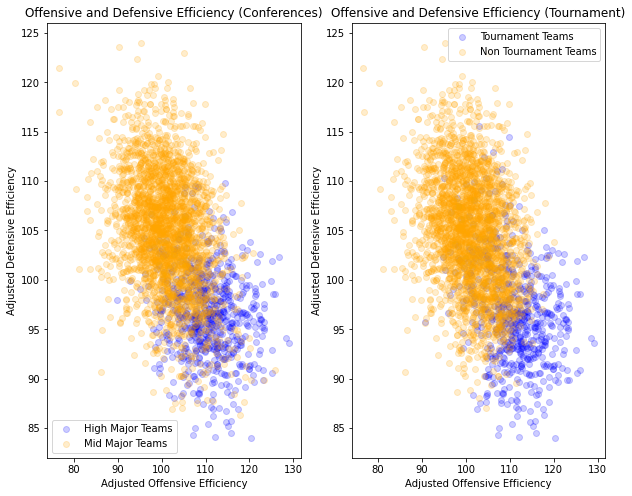

In [16]:
plt.figure(figsize = (10, 8))
plt.subplot(1,2,1)
plt.scatter(high_major.ADJOE, high_major.ADJDE, color = 'blue', label = 'High Major Teams', alpha = 0.2)
plt.scatter(mid_major.ADJOE, mid_major.ADJDE, color = 'orange', label = "Mid Major Teams", alpha = 0.2)
plt.xlabel("Adjusted Offensive Efficiency")
plt.ylabel("Adjusted Defensive Efficiency")
plt.title("Offensive and Defensive Efficiency (Conferences)")
plt.legend()

plt.subplot(1,2,2)
plt.scatter(data[data.TOURNEY == 1].ADJOE, data[data.TOURNEY == 1].ADJDE, color = 'blue', label = 'Tournament Teams', alpha = 0.2)
plt.scatter(data[data.TOURNEY == 0].ADJOE, data[data.TOURNEY == 0].ADJDE, color = 'orange', label = "Non Tournament Teams", alpha = 0.2)
plt.xlabel("Adjusted Offensive Efficiency")
plt.ylabel("Adjusted Defensive Efficiency")
plt.title("Offensive and Defensive Efficiency (Tournament)")
plt.legend()

plt.show()

As we can see, a Power 6 team on average has better adjusted offensive efficency and defensive efficiency than a mid-major team. Not coincidentally, when we plot the same parameters and separate by tournament teams and non-tournament teams, the graphs are strikingly similar. It leads us to exploring the disparities in the postseason.

### Postseason Consistency

In [17]:
high_major_tourney = high_major.groupby('TEAM').TOURNEY.sum()
mid_major_tourney = mid_major.groupby('TEAM').TOURNEY.sum()
hm_array = []
mm_array = []
for i in range(5,10):
    hm_array.append(sum(high_major_tourney >= i))
    mm_array.append(sum(mid_major_tourney >= i))

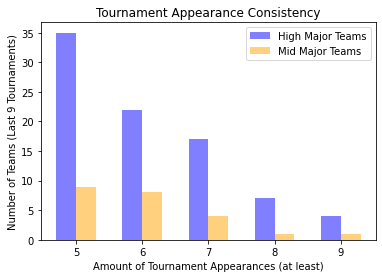

In [18]:
ind = np.arange(5)
width = 0.3
plt.bar(ind, hm_array , width, label='High Major Teams', color = 'blue', alpha = 0.5)
plt.bar(ind + width, mm_array, width, label='Mid Major Teams', color = 'orange', alpha = 0.5)
plt.xlabel('Amount of Tournament Appearances (at least)')
plt.ylabel('Number of Teams (Last 9 Tournaments)')
plt.title('Tournament Appearance Consistency')
plt.xticks(ind + width / 2, ('5', '6', '7', '8', '9'))
plt.legend(loc='best')
plt.show()

This graph shows how many teams have made the tournament at least n times in the last 9 years (for 5 <= n <= 9). We see that there are many more "consistent" teams in high major leagues. This is made even more significant by the fact that the dataset has more than 3 times more mid-major teams than high-major teams.

### Postseason Success: Seeding

In [19]:
high_major_post = high_major[high_major.TOURNEY == True]
mid_major_post = mid_major[mid_major.TOURNEY == True]

In [20]:
high_major_seeding = np.mean(high_major_post.SEED)
mid_major_seeding = np.mean(mid_major_post.SEED)

In [21]:
print("Average Seeding for High Major Teams: ", high_major_seeding)
print("Average Seeding for Mid Major Teams: ", mid_major_seeding)

Average Seeding for High Major Teams:  5.933962264150943
Average Seeding for Mid Major Teams:  11.904761904761905


As expected, because high major teams are typically better than low major teams, they get seeded higher in the tournament when they make it.

In [22]:
double_digit_seed_hm = len(high_major_post[high_major_post.SEED >= 10]) / len(high_major_post)
double_digit_seed_mm = len(mid_major_post[mid_major_post.SEED >= 10]) / len(mid_major_post)
print("Proportions of High Major Teams with Double Digit Seed: ", double_digit_seed_hm)
print("Proportions of Mid Major Teams with Double Digit Seed: ", double_digit_seed_mm)

Proportions of High Major Teams with Double Digit Seed:  0.19811320754716982
Proportions of Mid Major Teams with Double Digit Seed:  0.7687074829931972


In fact, less than 20% of tournament high major conference teams are seeded 10 and below, while over 75% of mid-major schools are. As by the nature of the tournament, it is much more difficult to advance far if a team is seeded lower.

The following graphic shows a better picture of how the seeding is distributed.

In [23]:
seeding = data[data.TOURNEY == True].groupby('SEED').TEAM.count()
high_major_seeding = high_major_post.groupby('SEED').TEAM.count()

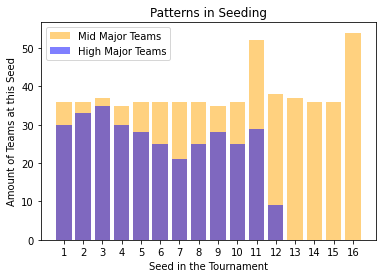

In [24]:
plt.bar(seeding.index, seeding, color = 'orange', alpha = 0.5, label = 'Mid Major Teams')
plt.bar(high_major_seeding.index, high_major_seeding, color = 'blue', alpha = 0.5, label = 'High Major Teams')
plt.xlabel("Seed in the Tournament")
plt.ylabel("Amount of Teams at this Seed")
plt.title("Patterns in Seeding")
plt.legend()
plt.xticks(seeding.index)
plt.show()

This graph reveals interesting patterns in tournament seeding with regards to high major teams and mid major teams. For those that do not know, there are spikes in the amount of 11 seeds and 16 seeds because there are 6 of each in every tournament, as opposed to the 4 of every other seed. 

It is interesting to see that no high major team has been seeded 13 or worse in any of the past 9 tournaments. It is also worth exploring why the peak of the ratio of high major teams at the seed is at the 3 seed line, instead of the 1 seed. 

### Postseason Success: Results

In [25]:
high_major_results = high_major_post.groupby('POSTSEASON').TEAM.count()
mid_major_results = mid_major_post.groupby('POSTSEASON').TEAM.count()
total_count = data.groupby('POSTSEASON').TEAM.count()

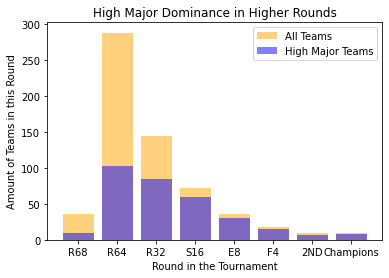

In [26]:
plt.bar(total_count.index, total_count, color = 'orange', alpha = 0.5, label = 'All Teams')
plt.bar(high_major_results.index, high_major_results, color = 'blue', alpha = 0.5, label = 'High Major Teams')
plt.xlabel("Round in the Tournament")
plt.ylabel("Amount of Teams in this Round")
plt.title("High Major Dominance in Higher Rounds")
plt.legend()
plt.show()

As expected, because of the higher seeding and better play, high-major teams are much more likely to make it far in the tournament. The following graphic will prove that.

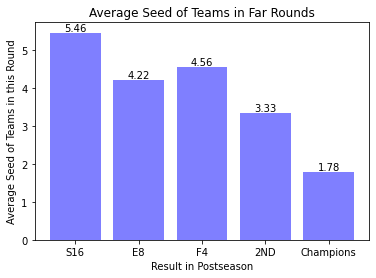

In [27]:
success_seeds = data[data.POSTSEASON >= 'S16'].groupby('POSTSEASON').SEED.mean()
success_seeds = success_seeds[3:8]
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i] + 0.05, np.round(y[i],2), ha = 'center')
plt.bar(success_seeds.index, success_seeds, color = 'b', alpha = 0.5)
plt.xlabel("Result in Postseason")
plt.ylabel("Average Seed of Teams in this Round")
plt.title("Average Seed of Teams in Far Rounds")
addlabels(success_seeds.index, success_seeds)
plt.show()

With our knowledge that the average seed for high major teams is around 5.9, it makes sense that majority of teams that go far are teams that belong to high major leagues.

### Postseason Success: Results of High Seeding

To combine the last two sections, I want to explore how conferences affect how high-seeded teams finish in the tournament.

In [28]:
hm_top_6 = high_major_post[high_major_post.SEED <= 6]
mm_top_6 = mid_major_post[mid_major_post.SEED <= 6]
hm_top_6_results = hm_top_6.groupby('POSTSEASON').TEAM.count()
mm_top_6_results = mm_top_6.groupby('POSTSEASON').TEAM.count()
hm_top_6_results_prop = hm_top_6_results / len(hm_top_6)
mm_top_6_results_prop = mm_top_6_results / len(mm_top_6)

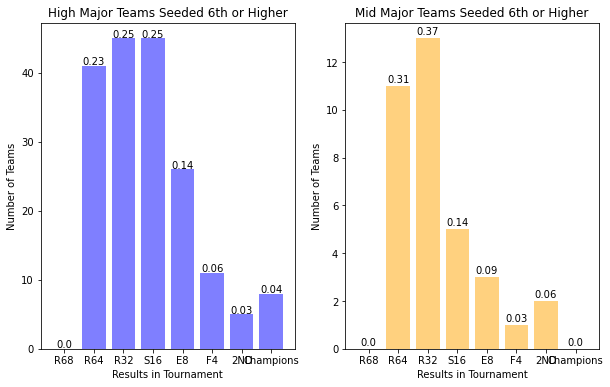

In [29]:
def addlabels2(x,y,z):
    for i in range(len(x)):
        plt.text(i, y[i] + 0.15, np.round(z[i],2), ha = 'center')
plt.figure(figsize = (10, 6))
plt.subplot(1,2,1)
plt.bar(hm_top_6_results.index, hm_top_6_results, color = 'blue', alpha = 0.5)
plt.xlabel('Results in Tournament')
plt.ylabel('Number of Teams')
plt.title('High Major Teams Seeded 6th or Higher')
addlabels2(hm_top_6_results_prop.index, hm_top_6_results, hm_top_6_results_prop) 

plt.subplot(1,2,2)
plt.bar(mm_top_6_results.index, mm_top_6_results, color = 'orange', alpha = 0.5)
plt.xlabel('Results in Tournament')
plt.ylabel('Number of Teams')
plt.title('Mid Major Teams Seeded 6th or Higher')
addlabels2(mm_top_6_results_prop.index, mm_top_6_results, mm_top_6_results_prop) 
plt.show()

Plotted here are the results of every team seeded 6th or higher, separated by high major vs mid major. The numbers on each bar represent the proportions of each result to account for the disparity in the amount of high seeded teams. 

As we can see, mid-major teams are more likely to get upset in the first two rounds, with 68% of them doing so, compared to the 48% of high major teams losing in the first weekend. This could be because mid-majors typically do not get the opportunities to play against good opponents during the regular season. If they were high-seeded, then they probably dominated their conference and had a lot of wins there. Once they get into the tournament, they are matched against power conference schools that have been playing against real competition their entire season. "Upsets" are bound to happen under this circumstance.

## Mid Major Outliers

As we can see in all of our plots, while high major teams dominate postseason consistency, seeding, and success, there still are some mid major teams that have performed well over the last 9 years. 

In [63]:
mm_consistent = mid_major_tourney[mid_major_tourney >= 5]
mm_avg_seed = np.round(mid_major_post.groupby('TEAM').SEED.mean(),2)
good_mid_majors = pd.concat([mm_consistent, mm_avg_seed], axis = 1).dropna(axis = 0).rename(columns = 
                {"TOURNEY" : "TOURNAMENT APPEARANCES", "SEED" : "AVERAGE SEED"})

In [64]:
good_mid_majors

,TOURNAMENT APPEARANCES,AVERAGE SEED
TEAM,,
Cincinnati,6.0,6.17
Gonzaga,9.0,3.33
Iona,6.0,14.67
New Mexico St.,7.0,13.00
San Diego St.,6.0,7.33
South Dakota St.,5.0,13.20
Texas Southern,6.0,15.83
VCU,7.0,7.86
Wichita St.,7.0,7.57


Here are all the mid-majors who have made at least 5 tournaments out of the last 9, along with the average seed of each team. 

In [32]:
mm_top_seeds = mid_major_post[mid_major_post.SEED <= 4]
pd.DataFrame(mm_top_seeds.groupby('TEAM').TEAM.count()).rename(columns = {'TEAM':'APPEARANCES AS TOP 4 SEED'}) 

,APPEARANCES AS TOP 4 SEED
TEAM,
Cincinnati,1
Gonzaga,7
Houston,2
Louisville,1
New Mexico,1
Saint Louis,1
San Diego St.,1
Wichita St.,2


Here are all the mid-majors that have been a 4 seed or higher in the last 9 tournaments.

### Gonzaga Bulldogs

Clearly from our tables, Gonzaga seems to be the most impressive mid-major team. We will take a closer look at this outlier.

In [33]:
gonzaga = data[data.TEAM == 'Gonzaga']
gonzaga[['YEAR', 'SEED', 'POSTSEASON']].sort_values('YEAR')

,YEAR,SEED,POSTSEASON
2836,2013,1.0,R32
2829,2014,8.0,R32
737,2015,2.0,E8
3142,2016,11.0,S16
709,2017,1.0,2ND
3143,2018,4.0,S16
738,2019,1.0,E8
358,2021,1.0,2ND
0,2022,1.0,S16


Though Gonzaga has not won a national championship in recent history, it has consistently been a national powerhouse despite coming from a mid-major conference. With a population of under 8,000 students, Gonzaga puts majority of its focus and resources into its basketball program. Coached by a future Hall of Fame coach in Mark Few, Gonzaga maintains its success through strong recruiting classes and veteran players. Only once in the last 9 tournaments has Gonzaga been a double digit seed, which we saw is very common for mid majors. Even then, Gonzaga made it to the Sweet Sixteen that year.

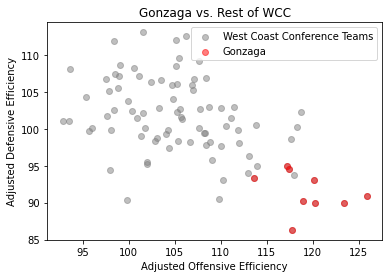

In [34]:
wcc = data[data.CONF == 'WCC']
plt.scatter(wcc.ADJOE, wcc.ADJDE, color = 'gray', alpha = 0.5, label = 'West Coast Conference Teams')
plt.scatter(gonzaga.ADJOE, gonzaga.ADJDE, color = 'red', alpha = 0.5, label = 'Gonzaga')
plt.xlabel('Adjusted Offensive Efficiency')
plt.ylabel('Adjusted Defensive Efficiency')
plt.title('Gonzaga vs. Rest of WCC')
plt.legend()
plt.show()

Gonzaga has dominated the West Coast Conference for the last decade, acting as outliers in adjusted offensive and defensive efficiency in the conference. Though the data does not show it, Gonzaga has actually been dominating this conference for many decades. 

### Houston Cougars

In [35]:
data[data.TEAM == 'Houston'].sort_values('YEAR', ascending = False)[['TEAM', 'ADJOE', 
    'ADJDE', 'POSTSEASON', 'SEED', 'YEAR']]

,TEAM,ADJOE,ADJDE,POSTSEASON,SEED,YEAR
1,Houston,116.5,88.5,E8,5.0,2022
360,Houston,119.1,91.3,F4,2.0,2021
3113,Houston,115.7,90.5,S16,3.0,2019
2757,Houston,114.8,93.9,R32,6.0,2018
912,Houston,112.8,98.1,NaN,NaN,2017
904,Houston,116.2,104.6,NaN,NaN,2016
896,Houston,100.9,102.3,NaN,NaN,2015
2270,Houston,110.7,107.9,NaN,NaN,2014
2563,Houston,106.0,106.0,NaN,NaN,2013


As we can see, Houston has been on the rise for the last 5 seasons, having made the tournament as a high seed each time. Houston's defense has become one of the strongest in the nation, allowing them to match up with high-major teams when it matters. 

However, as happens with many successful mid-majors in past history, Houston is planning to move into a high-major conference (the Big 12) next year to match up with better competition.

### Wichita St. Shockers

In [36]:
data[data.TEAM == 'Wichita St.'].sort_values('YEAR', ascending = False)[['TEAM', 'ADJOE', 
    'ADJDE', 'POSTSEASON', 'SEED', 'YEAR']]

,TEAM,ADJOE,ADJDE,POSTSEASON,SEED,YEAR
88,Wichita St.,103.9,95.5,NaN,NaN,2022
426,Wichita St.,108.4,97.3,R68,11.0,2021
935,Wichita St.,106.5,94.7,NaN,NaN,2019
2878,Wichita St.,120.9,102.7,R64,4.0,2018
2800,Wichita St.,117.2,92.2,R32,10.0,2017
2799,Wichita St.,110.3,87.8,R32,11.0,2016
3130,Wichita St.,114.3,91.5,S16,7.0,2015
2820,Wichita St.,116.4,93.0,R32,1.0,2014
760,Wichita St.,110.6,91.0,F4,9.0,2013


Wichita St. is sort of an opposite story to Houston. Before the last 5 seasons, Wichita State was a relatively strong mid-major school, making the tournmanet in 6 straight years and seeding high.

### Mid Major Postseason

In [37]:
mid_major_post[mid_major_post.POSTSEASON >= 'E8'][['TEAM', 'YEAR', 'CONF', 'ADJOE', 'ADJDE', 'SEED', 'POSTSEASON']]

,TEAM,YEAR,CONF,ADJOE,ADJDE,SEED,POSTSEASON
1,Houston,2022,Amer,116.5,88.5,5.0,E8
103,Saint Peter's,2022,MAAC,99.4,93.1,15.0,E8
358,Gonzaga,2021,WCC,125.9,90.9,1.0,2ND
360,Houston,2021,Amer,119.1,91.3,2.0,F4
709,Gonzaga,2017,WCC,117.8,86.3,1.0,2ND
717,Connecticut,2014,Amer,112.5,91.3,7.0,Champions
737,Gonzaga,2015,WCC,120.2,93.1,2.0,E8
738,Gonzaga,2019,WCC,123.4,89.9,1.0,E8
742,Dayton,2014,A10,113.0,99.1,11.0,E8
752,Loyola Chicago,2018,MVC,110.5,95.4,11.0,F4


Above is a chart of all the mid-major teams that have made it to the elite eight or farther in the last 9 years. The only schools that have done so more than once are Gonzaga (4) and Houston (2). Every other team has been a miraculous Cinderalla story without any consistency. The only team to have won the entire tournament is the University of Conneticut (UCONN) from the American conference in 2014. However, UCONN later joined a power conference in the Big East shortly after. 

As we explore mid-major teams, it becomes more and more clear that Gonzaga is simply an outlier. No mid-major team will be able to maintain consistent success like Gonzaga has. While Wichita St. put together a run of strong seasons, it has since fallen out of relevancy. Houston seemed to be a potential competitor, but it is moving to a high major conference soon. 

### Cinderella Teams

In this section, we will explore mid-major Cinderella teams and whether they share common statistics. My definition of a Cinderella Team is a team seeded 9th or worse making it to the Sweet 16 or better. Doing so would mean they have to beat a higher seed in the first round, then win at least another matchup. A team that is seeded as a 9 seed would have to beat the 1 seed to advance to the Sweet 16, so I included them in my definition of a Cinderella team.

In [38]:
cinderella = mid_major_post[(mid_major_post.SEED >= 9) & (mid_major_post.POSTSEASON >= 'S16')]
cinderella[['TEAM', 'CONF', 'POSTSEASON', 'SEED']]

,TEAM,CONF,POSTSEASON,SEED
103,Saint Peter's,MAAC,E8,15.0
480,Oral Roberts,Sum,S16,15.0
742,Dayton,A10,E8,11.0
752,Loyola Chicago,MVC,F4,11.0
760,Wichita St.,MVC,F4,9.0
3142,Gonzaga,WCC,S16,11.0
3158,La Salle,A10,S16,13.0
3159,Florida Gulf Coast,ASun,S16,15.0


There have been 8 cinderellas in the last 9 tournaments, with the most recent two being 15 seeds. We will compare their stats with other mid-major teams seeded 9th or worse to see if there are any patterns in these specific Cinderella teams.

In [39]:
non_cinderella = mid_major_post[(mid_major_post.SEED >= 9) & (mid_major_post.POSTSEASON < 'S16')]
stats = ['ADJOE', 'ADJDE', 'EFG_O', 'EFG_D', 'TOR', 'TORD', 'ORB', 'DRB', 'FTR', '2P_O', '3P_O', 'ADJ_T']
cinderella_avg = []
non_cinderella_avg = []
for stat in stats:
    cinderella_avg.append(cinderella[stat].mean())
    non_cinderella_avg.append(non_cinderella[stat].mean())

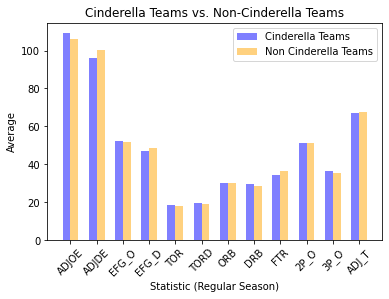

In [40]:
ind = np.arange(12)
width = 0.3
plt.bar(ind, cinderella_avg , width, label='Cinderella Teams', color = 'blue', alpha = 0.5)
plt.bar(ind + width, non_cinderella_avg, width, label='Non Cinderella Teams', color = 'orange', alpha = 0.5)
plt.xlabel('Statistic (Regular Season)')
plt.ylabel('Average')
plt.title('Cinderella Teams vs. Non-Cinderella Teams')
plt.xticks(ind + width / 2, ('ADJOE', 'ADJDE', 'EFG_O', 'EFG_D', 'TOR', 'TORD', 'ORB', 'DRB', 'FTR', '2P_O', '3P_O', 'ADJ_T'),
          rotation = 45)
plt.legend(loc='best')
plt.show()

We see that the mean stats for cinderella teams are very similar to those of non-cinderella teams. The only differences is that on average, cinderella teams have a better offensive and defensive efficiency, which coincides with our previous findings that teams that go far into the tournament typically have higher offensive efficiency and lower defensive efficiency. So, when picking your bracket, if you want to find a cinderella team to support, adjusted offensive and defensive efficiency are the stats to look at.

## Trends Throughout Seasons

As we know, every single tournament, there will be at least 26 mid-major teams that get an automatic bid to March Madness by winning its respective conference tournament. This section will explore how the landscape of mid-major relevancy has changed throughout the past 9 postseasons.

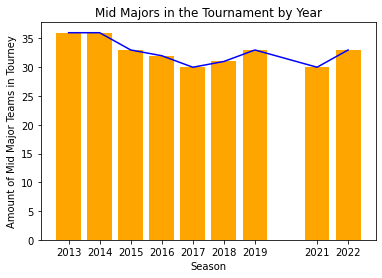

In [41]:
mm_by_year = mid_major_post.groupby('YEAR').TEAM.count()
plt.bar(mm_by_year.index, mm_by_year, color = 'orange')
plt.plot(mm_by_year, color = 'blue')
plt.xlabel('Season')
plt.xticks(mm_by_year.index)
plt.ylabel('Amount of Mid Major Teams in Tourney')
plt.title('Mid Majors in the Tournament by Year')
plt.show()

There seems to be no apparent strong trend over the last 9 tournaments. There are many factors that affect whether mid-majors get to be in the tournament, and this graph does not tell us enough information to conclude anything. For example, strength of schedule may be valued by the committee one year, and the next year it may be long winning streaks that have stronger influence. One of the largest factors is who wins the automatic bid in these mid major conferences. Imagine, for an easy example, that Gonzaga is dominating the WCC. If Saint Mary's (another strong team in that conference) were to win the end of season tournament, then they would automatically enter March Madness. The committee cannot ignore Gonzaga, however, and thus they would get an invitation too. This allows for two mid-major teams, whereas if Gonzaga won the autobid, Saint Mary's may not have had a chance.

Looking further than this, we will explore the seeding of mid-majors over the years.

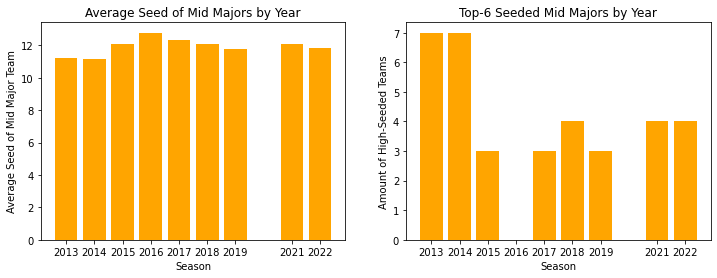

In [42]:
mm_seed_by_year = mid_major_post.groupby('YEAR').SEED.mean()
mm_high_seed_by_year = mid_major_post[mid_major_post.SEED <= 6].groupby('YEAR').TEAM.count()

plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
plt.bar(mm_seed_by_year.index, mm_seed_by_year, color = 'orange')
plt.xlabel('Season')
plt.xticks(mm_seed_by_year.index)
plt.ylabel('Average Seed of Mid Major Team')
plt.title('Average Seed of Mid Majors by Year')

plt.subplot(1,2,2)
plt.bar(mm_high_seed_by_year.index, mm_high_seed_by_year, color = 'orange')
plt.ylabel('Amount of High-Seeded Teams')
plt.xlabel('Season')
plt.xticks(mm_by_year.index)
plt.title('Top-6 Seeded Mid Majors by Year')
plt.show()

Again, there seems to not be a strong pattern over the last 9 years for seeding in mid majors. Every season, the average seed of mid-majors is around 11-13, so there is not much variation there. When we look at the amount of top-6 seeded teams over the last 9 tournaments, we again do not see a trend. It is interesting that 7 mid-majors were seeded high in both 2013-2014, and that NONE of the 24 top-6 seeds in 2016 came from mid-major conferences.

Now, we will explore postseason success.

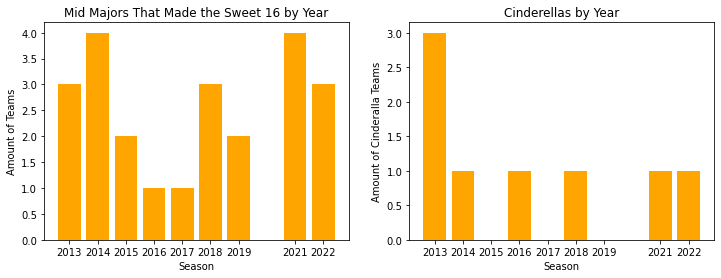

In [43]:
plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
s16_by_year = mid_major_post[mid_major_post.POSTSEASON >= 'S16'].groupby('YEAR').TEAM.count()
plt.bar(s16_by_year.index, s16_by_year, color = 'orange')
plt.xlabel('Season')
plt.xticks(s16_by_year.index)
plt.ylabel('Amount of Teams')
plt.title('Mid Majors That Made the Sweet 16 by Year')

plt.subplot(1,2,2)
cinderella_by_year = mid_major_post[(mid_major_post.POSTSEASON >= 'S16') & (mid_major_post.SEED >= 9)].groupby('YEAR').TEAM.count()
plt.bar(cinderella_by_year.index, cinderella_by_year, color = 'orange')
plt.ylabel('Amount of Cinderalla Teams')
plt.xlabel('Season')
plt.xticks(mm_by_year.index)
plt.title('Cinderellas by Year')
plt.show()

The trend for teams that made the Sweet 16 or better is also not strong. Cinderella Teams, which I defined as below 9-seeds that made the Sweet 16 or better, also seems quite random. 

Overall, there is no significant trend in mid-major relevancy over the last 9 tournaments. We cannot argue that mid-majors are on the rise (or that they're on the decline). Every year seems random when it comes to how many mid-majors will do good.


## Relevancy to Us

We have explored the differences between high-major schools and mid-major schools. However, it is not as relevant to us Bruins, as UCLA will never be a mid-major school. Now, we will look into the last 9 tournaments for the Pac-12 (UCLA's current conference) and the Big Ten, the conference that UCLA will move to in 2024.

### Pac-12

In [44]:
pac_12 = data[data.CONF == 'P12']

In [45]:
pac_12.TOURNEY.sum() / 9

4.444444444444445

The Pacific-12 has been one of the worst power conferences recently. Over the last 9 tournaments, they have only sent an average of 4.44 schools each season. Over that same span, each of the other 5 high-major conferences have sent more teams. 

In [46]:
adjoe = data.groupby('CONF').ADJOE.mean().sort_values(ascending = False)[0:6]
adjde = data.groupby('CONF').ADJDE.mean().sort_values()[0:6]
pd.DataFrame(adjoe)

,ADJOE
CONF,
B12,111.711111
ACC,111.260606
B10,111.045082
BE,110.553608
SEC,109.257937
P12,108.970370


In [47]:
pd.DataFrame(adjde)

,ADJDE
CONF,
B12,95.091111
B10,95.788525
SEC,96.485714
BE,96.535052
ACC,96.639394
P12,97.994444


We see that the average adjusted offensive and defensive efficiency for teams in the Pac-12 ranks worst amongst power conferences in the past 10 years. So how has the Pac-12 retained relevancy?

In [48]:
p12_tourney = pd.DataFrame(pac_12.groupby('TEAM').TOURNEY.sum())
p12_seed = pd.DataFrame(pac_12.groupby('TEAM').SEED.mean())
p12_tourney['AVERAGE SEED'] = p12_seed

In [49]:
p12_tourney.sort_values('TOURNEY', ascending = False)

,TOURNEY,AVERAGE SEED
TEAM,,
Arizona,7,3.142857
Oregon,7,7.142857
UCLA,7,7.142857
Colorado,4,7.750000
USC,4,8.000000
Arizona St.,3,10.666667
California,2,8.000000
Oregon St.,2,9.500000
Utah,2,4.000000


Arizona, Oregon, and UCLA have been relatively consistent tournament teams, each making it 7 times in the last 9 postseasons. In addition, they typically seed relatively high, with Arizona being an outlier in this group. However, besides those three schools, no other school is consistent. These teams lower the overall status and statistics of the Pac-12. With many other power conferences, there are many more strong teams and less weak teams, as we will see when we explore the Big Ten.

### Big Ten


In [50]:
big_ten = data[data.CONF == 'B10']
big_ten.TOURNEY.sum() / 9

7.111111111111111

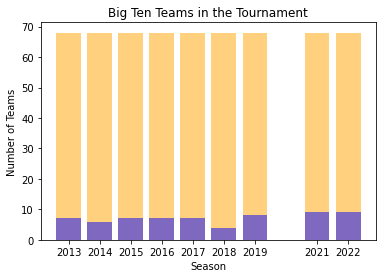

In [69]:
b10_count = big_ten.groupby('YEAR').TOURNEY.sum()
tourney_teams = [68,68,68,68,68,68,68,68,68]
plt.bar(b10_count.index, tourney_teams, color = 'orange', alpha = 0.5, label = "Tournament Teams")
plt.bar(b10_count.index, b10_count, color = 'blue', alpha = 0.5, label = "Big 10 Schools")
plt.xlabel('Season')
plt.ylabel('Number of Teams')
plt.xticks(b10_count.index)
plt.title('Big Ten Teams in the Tournament')
plt.show()

The Big Ten sends an impressively high 7 teams to the tournament on average each year. Considering only 68 teams throughout 32 conferences make the tournament, one conference having 7 of them is remarkable.

In [71]:
b10_tourney = pd.DataFrame(big_ten.groupby('TEAM').TOURNEY.sum())
b10_seed = np.round(pd.DataFrame(big_ten.groupby('TEAM').SEED.mean()),2)
b10_tourney['AVERAGE SEED'] = b10_seed
b10_tourney.sort_values('TOURNEY', ascending = False)

,TOURNEY,AVERAGE SEED
TEAM,,
Michigan St.,9,5.33
Michigan,8,5.12
Wisconsin,8,5.00
Ohio St.,7,6.14
Purdue,7,4.29
Iowa,6,7.00
Maryland,5,6.20
Indiana,4,7.00
Illinois,3,4.00


Clearly, the Big Ten has stronger and more consistent teams than the Pac-12. Not only will a move to the Big Ten increase profit for UCLA, but it will also expose our team to better competition throughout the season, allowing us to prepare for the tournament. 

This season, only 2 Pac-12 teams are in the top 45 in NET rankings (Arizona and UCLA). Within league play, UCLA does not have the opportunity to test itself against other teams that will be in the tournament. Meanwhile, every school in the Big Ten basically plays a tournament-bound team every week. This move to the Big Ten will make travel and some logistics tougher, but in the end, it will give UCLA a higher chance of winning it all.

### Mid-Majors to Watch This Year

As we saw in our section on mid-major outliers, Houston and Gonzaga are still strong teams that will be seeded high and expected to go far. In fact, Houston has been the number 1 ranked school for about a third of the season.

In our Cinderella section, we saw that Cinderella teams tend to have better adjusted offensive efficiency and defensive efficiency. Here are some notable mid-major schools that fulfill that condition: 

- Florida Atlantic (Conference USA)
- Memphis (American Conference)
- Utah St. (Mountain West Conference)
- New Mexico (Mountain West Conference)
- San Diego St. (Mountain West Conference)
- Liberty (ASUN Conference)
- Charleston (Colonial Athletic Conference)
- Saint Mary's (West Coast Conference)
- Boise State (Mountain West Conference)

If they make the tournament, look for these schools to exceed expectations.

## Conclusion

In this article, we explored how conferences work in college basketball, and what high-major conferences are. We saw the differences in mid-majors vs high-majors in both the regular season and March Madness implications. We then looked into mid-major outliers and what makes a "Cinderella" team. Lastly, we discover why UCLA is moving from the Pac-12 to the Big Ten and present mid-majors that could make noise this March. 